**Introducción a pandas**

*La libreria de `pandas` proporciona estructuras de datos y herramientas de análisis de datos fáciles de usar y de alto rendimiento. La estructura de datos principal es el `DataFrame`, que se puede considerar como una tabla bidimensional en memoria (como una hoja de cálculo, con nombres de columna y etiquetas de fila). Muchas funciones de Excel están disponibles de forma programática, como la creación de tablas dinámicas (pivot tables), el cálculo de columnas basadas en otras columnas, el trazado de gráficos, etc. También se pueden agrupar filas por valor de columna o unir tablas de forma muy similar a SQL. Pandas también es excelente en el manejo de series temporales.*


Importemos `pandas`. Usualmente se importa como `pd`:

In [1]:
import pandas as pd

# `Series`

La biblioteca de pandas contiene estas estructuras de datos útiles:

* `Series`, que discutiremos ahora. Un objeto Series es un array unidimensional, similar a una columna en una hoja de cálculo (con un nombre de columna y etiquetas de fila).
* `DataFrame`: es una tabla bidimensional, similar a una hoja de cálculo (con nombres de columna y etiquetas de fila).
* `Panel`: Se puede ver un `Panel` como un diccionario de `DataFrame`s. Estos son menos utilizados, por lo que no se tratará en este documento.

## Creando una `Series`


In [2]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar a `ndarray` 1D
Los objetos `Series` se comportan de manera similar a los `ndarray`s unidimensionales, con frecuencia se pueden pasar como parámetros a las funciones de NumPy:

In [3]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Las operaciones aritméticas en las `Series` también son posibles, y se aplican de elemento a elemento, como en los `ndarray`s:

In [4]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

De forma similar a NumPy, si agrega un número único a un `Series` , ese número se agrega a todos los elementos de la Series. Al proceso anterior se le denomina *broadcasting*.

In [5]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

Lo mismo aplica para todas las operaciones binarias tales como `*` o `/`, incluyendo las operaciones condicionales:

In [6]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Indexado de etiquetas
Cada elemento en una `Series` tiene un identificador único llamado *índice* (index). Por defecto, es simplemente el rango del elemento en la `Series` (comenzando en 0) pero también se pueden establecer las etiquetas índice manualmente:

In [7]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

Se puede usar un objeto `Series` como un diccionario (`dict`):

In [8]:
s2["bob"]

83

También puede acceder a los elementos mediante índices enteros, como en un array normal:

In [9]:
s2[1]

83

Por claridad, cuando se accede por etiqueta o mediante índices enteros, se recomienda utilizar siempre el atributo `loc` cuando se accede por etiqueta, y el atributo `iloc` cuando se accede mediante índices enteros:

In [10]:
s2.loc["bob"]

83

In [11]:
s2.iloc[1]

83

Particionar una `Series` también particiona las etiquetas índices:

In [12]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

Esto puede generar resultados inesperados al usar las etiquetas numéricas predeterminadas, por lo tanto hay que ser cuidadoso:

In [14]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [15]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

El primer elemento tiene la etiqueta de índice `2`. El elemento con la etiqueta de índice `0` está ausente de la partición:

In [16]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


Pero recuerda que se puede acceder a los elementos por índices enteros usando el atributo `iloc`. Esto ilustra otra razón por la cual siempre es mejor usar `loc` e `iloc` para acceder a los objetos `Series`:

In [14]:
surprise_slice.iloc[0]

1002

## Creación de `Series` usando `dict`
Se puede crear un objeto `Series` partir de un objeto `dict`. Las *keys* se usarán como etiquetas índice:

In [17]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

Se puede controlar qué elementos se desea incluir en la `Series` y en qué orden al especificar explícitamente el `index` deseado:

In [18]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Alineación automática
Cuando una operación involucra múltiples `Series`, `pandas` alinea automáticamente los elementos haciendo coincidir las etiquetas de índice.

In [19]:
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [20]:
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [21]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

La `Series` resultante contiene la unión de etiquetas índice de `s2` y `s3`. Cómo `"colin"` falta en `s2` y `"charles"` falta en `s3`, estos elementos tienen un valor de resultado `NaN` (NaN corresponde en ingés a *Not-a-Number* y significa que falta).

La alineación automática es muy útil cuando se trabaja con datos que pueden provenir de varias fuentes con diferentes estructuras y elementos faltantes. Pero si se olvida establecer las etiquetas índice correctas, se pueden obtener resultados extraños:

In [22]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

Pandas no pudo alinear la `Series`, ya que sus etiquetas no coinciden en absoluto, de ahí el resultado completo de `NaN`.

## Inicializar una `Series` con un escalar
También se puede inicializar un objeto `Series` utilizando un escalar y una lista de etiquetas índice, así todos los elementos se fijan en el escalar.

In [23]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## Nombre de las `Series` 
Una `Series` puede tener un nombre (`name`):

In [24]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Graficando `Series`
Pandas hace que sea fácil graficar los datos de la `Series` usando matplotlib, sólo falta importar *matplotlib* y llamar al método `plot`:

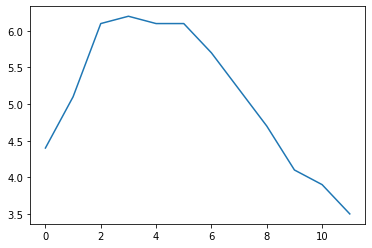

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
temperaturas = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperaturas, name="Temperatura")
s7.plot()
plt.show()

Hay muchas opciones para graficar datos. No es necesario verlos todos aquí. Si se necesita un tipo particular de gráfica (histogramas, diagramas de cajas [boxplot], etc), se puede bucar en la excelente sección de [Visualización](http://pandas.pydata.org/pandas-docs/stable/visualization.html) de la documentación de pandas.

# Objetos `DataFrame` 
Un objeto `DataFrame` representa una hoja de cálculo, con valores de celda, nombres de columna y etiquetas de índice de fila. Puede definir expresiones para calcular columnas basadas en otras columnas, crear tablas dinámicas, filas de grupos, dibujar gráficos, etc. Un `DataFrame` se puede ver como  un diccionario de `Series`.

## Creando un `DataFrame`
Se puede crear un DataFrame pasando un diccionario de objetos `Series` :

In [28]:
personas_dict = {
    "peso": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "nacimiento": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="año"),
    "niños": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Ciclismo", "Baile"], index=["alice", "bob"]),
}
personas = pd.DataFrame(personas_dict)
personas

,peso,nacimiento,niños,hobby
alice,68,1985,NaN,Ciclismo
bob,83,1984,3.0,Baile
charles,112,1992,0.0,NaN


In [29]:
print(personas)

         peso  nacimiento  niños     hobby
alice      68        1985    NaN  Ciclismo
bob        83        1984    3.0     Baile
charles   112        1992    0.0       NaN


Algunas cosas a tener en cuenta:

* las Series se alinearon automáticamente según su índice,
* los valores faltantes se representan como NaN ,
* los nombres de las `Series`se ignoran (el nombre "año" se descartó),
* los `DataFrame`s se muestran muy bien en Jupyter notebook.

Se puede acceder a las columnas prácticamente como se espera. Se devuelven como objetos de `Series`:

In [30]:
personas["nacimiento"]

alice      1985
bob        1984
charles    1992
Name: nacimiento, dtype: int64

Se puede también obtener varias columnas a la vez:

In [31]:
a = personas[["nacimiento", "hobby"]]
a

,nacimiento,hobby
alice,1985,Ciclismo
bob,1984,Baile
charles,1992,NaN


Si se pasa una lista de columnas y/o de índices (filas) al constructor del `DataFrame`, se garantizará que estas columnas y/o filas existirán, en ese orden, y no existirá ninguna otra columna/fila. Por ejemplo:

In [32]:
d2 = pd.DataFrame(
        personas_dict,
        columns=["nacimiento", "peso", "altura"],
        index=["bob", "alice", "eugene"]
     )
d2

,nacimiento,peso,altura
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Otra forma conveniente de crear un `DataFrame` es pasar todos los valores al constructor como un `ndarray`, o una lista de listas, y especificar los nombres de las columnas y las etiquetas índice de las filas por separado:

In [33]:
values = [
            [1985, np.nan, "Ciclismo",   68],
            [1984, 3,      "Baile",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["nacimiento", "niños", "hobby", "peso"],
        index=["alice", "bob", "charles"]
     )
d3

,nacimiento,niños,hobby,peso
alice,1985,NaN,Ciclismo,68
bob,1984,3.0,Baile,83
charles,1992,0.0,NaN,112


En lugar de un `ndarray` , también se puede pasar un objeto `DataFrame` :

In [34]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "niños"],
         index=["alice", "bob"]
     )
d4

,hobby,niños
alice,Ciclismo,NaN
bob,Baile,3.0


También es posible crear un `DataFrame` con un diccionario (o lista) de diccionarios (o lista):

In [35]:
personas = pd.DataFrame({
    "nacimiento": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Ciclismo", "bob": "Baile"},
    "peso": {"alice":68, "bob": 83, "charles": 112},
    "niños": {"bob": 3, "charles": 0}
})
personas

,nacimiento,hobby,peso,niños
alice,1985,Ciclismo,68,NaN
bob,1984,Baile,83,3.0
charles,1992,NaN,112,0.0


## Transpuesta
Se puede intercambiar columnas e índices utilizando el atributo `T` :

In [37]:
d6 = personas.T
d6

,alice,bob,charles
nacimiento,1985,1984,1992
hobby,Ciclismo,Baile,NaN
peso,68,83,112
niños,NaN,3.0,0.0


## Accediendo a filas 
Retornando al `Dataframe` `personas`:

In [38]:
personas

,nacimiento,hobby,peso,niños
alice,1985,Ciclismo,68,NaN
bob,1984,Baile,83,3.0
charles,1992,NaN,112,0.0


El atributo `loc` permite acceder a filas en lugar de columnas. El resultado es un objeto `Series` en el que los nombres de las columnas del `DataFrame` se asignan a etiquetas índice de las filas:

In [39]:
personas.loc["charles"]

nacimiento    1992
hobby          NaN
peso           112
niños          0.0
Name: charles, dtype: object

También se puede acceder a las filas mediante índices enteros usando el atributo `iloc`:

In [40]:
personas.iloc[2]

nacimiento    1992
hobby          NaN
peso           112
niños          0.0
Name: charles, dtype: object

También se puede obtener una partición de las filas, devolviendo un objeto `DataFrame`:

In [41]:
personas.iloc[1:3]

,nacimiento,hobby,peso,niños
bob,1984,Baile,83,3.0
charles,1992,NaN,112,0.0


Finalmente, se puede pasar una lista o array booleano para obtener las filas correspondientes:

In [42]:
personas[[True, False, True]]

,nacimiento,hobby,peso,niños
alice,1985,Ciclismo,68,NaN
charles,1992,NaN,112,0.0


Esto es más útil cuando se combina con expresiones booleanas:

In [38]:
personas[personas["nacimiento"] < 1990]

,nacimiento,hobby,peso,niños
alice,1985,Ciclismo,68,NaN
bob,1984,Baile,83,3.0


## Agregar y eliminar columnas 
En general, se puede tratar de objetos `DataFrame` como de diccionarios de `Series` , por lo que los siguientes ejemplos funcionan bien:

In [43]:
personas

,nacimiento,hobby,peso,niños
alice,1985,Ciclismo,68,NaN
bob,1984,Baile,83,3.0
charles,1992,NaN,112,0.0


In [44]:
personas["edad"] = 2018 - personas["nacimiento"]  # añade una nueva columna "edad"
personas["sobre 30"] = personas["edad"] > 30      # añade otra columna "sobre 30"
nacimientos = personas.pop("nacimiento")
del personas["niños"]

personas

,hobby,peso,edad,sobre 30
alice,Ciclismo,68,33,True
bob,Baile,83,34,True
charles,NaN,112,26,False


In [45]:
nacimientos

alice      1985
bob        1984
charles    1992
Name: nacimiento, dtype: int64

Cuando se agrega una nueva columna, se debe tener el mismo número de filas. Las filas faltantes se rellenan con `NaN`, y las filas adicionales se ignoran:

In [46]:
personas["mascotas"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # falta alice, eugene es ignorada
personas

,hobby,peso,edad,sobre 30,mascotas
alice,Ciclismo,68,33,True,NaN
bob,Baile,83,34,True,0.0
charles,NaN,112,26,False,5.0


Una nueva columna se agrega al final (a la derecha) de forma predeterminada. También se puede insertar una columna en cualquier otro lugar utilizando el método `insert()`:

In [47]:
personas.insert(1, "altura", [172, 181, 185])
personas

,hobby,altura,peso,edad,sobre 30,mascotas
alice,Ciclismo,172,68,33,True,NaN
bob,Baile,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


## Asignando nuevas columnas
También se pueden crear nuevas columnas llamando al método `assign()`. Ten en cuenta que esto devuelve un nuevo objeto `DataFrame`, el original no se modifica:

In [50]:
personas.assign(
    IMC = personas["peso"] / (personas["altura"] / 100) ** 2,
    tiene_mascotas = personas["mascotas"] > 0
)

,hobby,altura,peso,edad,sobre 30,mascotas,IMC,tiene_mascotas
alice,Ciclismo,172,68,33,True,NaN,22.985398,False
bob,Baile,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


No se puede acceder a columnas creadas dentro de la misma asignación:

In [49]:
try:
    personas.assign(
        IMC = personas["peso"] / (personas["altura"] / 100) ** 2,
        sobrepeso = personas["IMC"] > 25
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'IMC'


La solución es dividir esta tarea en dos asignaciones consecutivas:

In [51]:
d6 = personas.assign(IMC = personas["peso"] / (personas["altura"] / 100) ** 2)
d6.assign(sobrepeso = d6["IMC"] > 25)

,hobby,altura,peso,edad,sobre 30,mascotas,IMC,sobrepeso
alice,Ciclismo,172,68,33,True,NaN,22.985398,False
bob,Baile,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


## Evaluando una expresión
Una gran característica que soporta `pandas` es la evaluación de una expresión. Esto se basa en la libreria *numexpr* que debe instalarse.

In [52]:
personas.eval("peso / (altura/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

Las expresiones de asignación también son compatibles. Se establece `inplace=True` para modificar directamente el `DataFrame` en lugar de obtener una copia modificada:

In [53]:
personas.eval("IMC = altura / (peso/100) ** 2", inplace = True)
personas

,hobby,altura,peso,edad,sobre 30,mascotas,IMC
alice,Ciclismo,172,68,33,True,NaN,371.972318
bob,Baile,181,83,34,True,0.0,262.737698
charles,NaN,185,112,26,False,5.0,147.480867


Puede usar una variable local o global en una expresión prefijada con `'@'`:

In [55]:
umbral_sobrepeso = 30
personas.eval("sobrepeso = IMC > @umbral_sobrepeso", inplace = True)
personas

,hobby,altura,peso,edad,sobre 30,mascotas,IMC,sobrepeso
alice,Ciclismo,172,68,33,True,NaN,371.972318,True
bob,Baile,181,83,34,True,0.0,262.737698,True
charles,NaN,185,112,26,False,5.0,147.480867,True


## Consultando un  `DataFrame`
El método `query()` permite filtrar un `DataFrame` basado en una expresión de consulta:

In [56]:
personas.query("edad > 30 and mascotas == 0")

,hobby,altura,peso,edad,sobre 30,mascotas,IMC,sobrepeso
bob,Baile,181,83,34,True,0.0,262.737698,True


## Ordenando un `DataFrame`
Puede ordenar un `DataFrame` llamando a su método `sort_index`. Por defecto, ordena las filas por su etiqueta índice, en orden ascendente, pero se puede invertir el orden:

In [57]:
personas.sort_index(ascending=False)

,hobby,altura,peso,edad,sobre 30,mascotas,IMC,sobrepeso
charles,NaN,185,112,26,False,5.0,147.480867,True
bob,Baile,181,83,34,True,0.0,262.737698,True
alice,Ciclismo,172,68,33,True,NaN,371.972318,True


Tenga en cuenta que `sort_index` devolvió una copia ordenada del `DataFrame`. Para modificar `personas` directamente, se puede establecer el argumento `inplace` en `True`. Además, se puede ordenar las columnas en lugar de las filas estableciendo `axis=1`:

In [58]:
personas.sort_index(axis=1, inplace=True)
personas

,IMC,altura,edad,hobby,mascotas,peso,sobre 30,sobrepeso
alice,371.972318,172,33,Ciclismo,NaN,68,True,True
bob,262.737698,181,34,Baile,0.0,83,True,True
charles,147.480867,185,26,NaN,5.0,112,False,True


Para ordenar el `DataFrame` por los valores en lugar de las etiquetas, podemos usar `sort_values` y especificar la columna por la cual se va a ordenar:

In [59]:
personas.sort_values(by="edad", inplace=True)
personas

,IMC,altura,edad,hobby,mascotas,peso,sobre 30,sobrepeso
charles,147.480867,185,26,NaN,5.0,112,False,True
alice,371.972318,172,33,Ciclismo,NaN,68,True,True
bob,262.737698,181,34,Baile,0.0,83,True,True


## Graficando un `DataFrame`
Al igual que para `Series`, pandas hace que sea fácil realizar buenos gráficos a partir de un `DataFrame`.

Por ejemplo, es fácil crear un diagrama de líneas a partir de los datos de un `DataFrame` llamando a su método de `plot`:

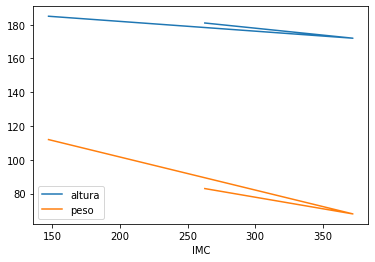

In [60]:
personas.plot(kind = "line", x = "IMC", y = ["altura", "peso"])
plt.show()

Se pueden pasar argumentos adicionales soportados por las funciones de matplotlib. Por ejemplo, se puede crear un diagrama de dispersión y pasarle una lista de tamaños usando el argumento `s` de la función `scatter()` de matplotlib:

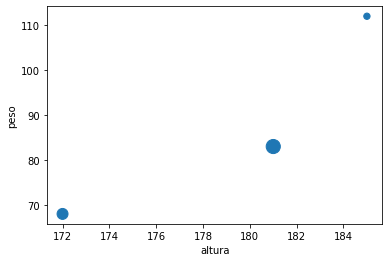

In [61]:
personas.plot(kind = "scatter", x = "altura", y = "peso", s=[40, 120, 200])
plt.show()

Nuevamente, hay muchas opciones para enumerar aquí: la mejor opción es desplazarse por la página de [Visualización](http://pandas.pydata.org/pandas-docs/stable/visualization.html) en la documentación de pandas, encontrar la gráfica que le interesa y ver el código de ejemplo.

## Operaciones en `DataFrame`s
Aunque los `DataFrame`s no intentan imitar los arrays de NumPy, existen algunas similitudes. Vamos a crear un `DataFrame` para demostrar esto:

In [62]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


Se pueden aplicar funciones matemáticas de NumPy en un `DataFrame`, la función se aplica a todos los valores:

In [63]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Del mismo modo, agregar un valor único a un `DataFrame` agregará ese valor a todos los elementos en el `DataFrame`. Esto se llama *broadcasting*:

In [64]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Por supuesto, lo mismo es cierto para todas las demás operaciones binarias, incluidas las operaciones aritméticas  (`*`,`/`,`**`...) y las operaciones condicionales (`>`, `==`...):

In [65]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Las operaciones de agregación, como calcular el `max`, la `sum`, la `mean` de un `DataFrame`, se aplican a cada columna, y se recupera un objeto `Series`:

In [66]:
grades.mean(axis=1)

alice      8.333333
bob        9.333333
charles    4.666667
darwin     9.666667
dtype: float64

El método `all`también es una operación de agregación: comprueba si todos los valores son `True` o no. Veamos durante qué meses todos los estudiantes obtuvieron una calificación superior a 5:

In [67]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

La mayoría de estas funciones toman un parámetro opcional `axis` que permite especificar a lo largo del eje del `DataFrame` que se desea que se ejecute la operación. El valor predeterminado es `axis=0`, lo que significa que la operación se ejecuta verticalmente (en cada columna). Se puede configurar `axis=1` para ejecutar la operación horizontalmente (en cada fila). Por ejemplo, busquemos qué estudiantes tenían todas las calificaciones mayores que 5:

In [68]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

El método `any` retorna `True` si cualquier valor es verdadero. Veamos quién obtuvo al menos una calificación de 10:

In [69]:
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

Si se agrega un objeto `Series` a un `DataFrame` (o se ejecuta cualquier otra operación binaria), pandas intenta transmitir (broadcasting) la operación a todas las filas en el `DataFrame`. Esto solo funciona si `Series` tiene el mismo tamaño que las filas del `DataFrame`. Por ejemplo, restemos la media del DataFrame (un objeto `Series`) de DataFrame:

In [70]:
grades - grades.mean()  # equivale a: grades - [7.75, 8.75, 7.50]

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


Restamos 7.75 de todos los grados de septiembre, 8.75 desde octubre 7.50 hasta noviembre. Esto es equivalente a restar este DataFrame:

In [71]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


Si desea restar la media global de cada grado, esta es una forma de hacerlo:

In [72]:
grades - grades.values.mean() # resta la media global (8.00) a todos los elementos

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


## Funciones generales
Cuando se trata de grandes `DataFrames`, es útil obtener una visión general rápida de su contenido. Pandas ofrece algunas funciones para esto. Primero, creemos un `DataFrame` grande con una mezcla de valores numéricos, valores perdidos y valores de texto. Observa cómo Jupyter muestra solo las esquinas de `DataFrame`:

In [73]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


El método `head()` devuelve las 5 filas superiores:

In [74]:
large_df.head(n=10)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
5,55.0,66.0,99.0,Blabla,154.0,44.0,143.0,77.0,33.0,11.0,...,66.0,55.0,66.0,99.0,154.0,44.0,143.0,77.0,33.0,11.0
6,66.0,77.0,110.0,Blabla,165.0,55.0,154.0,88.0,44.0,22.0,...,77.0,66.0,77.0,110.0,165.0,55.0,154.0,88.0,44.0,22.0
7,77.0,88.0,121.0,Blabla,NaN,66.0,165.0,99.0,55.0,33.0,...,88.0,77.0,88.0,121.0,NaN,66.0,165.0,99.0,55.0,33.0
8,88.0,99.0,132.0,Blabla,NaN,77.0,NaN,110.0,66.0,44.0,...,99.0,88.0,99.0,132.0,NaN,77.0,NaN,110.0,66.0,44.0
9,99.0,110.0,143.0,Blabla,11.0,88.0,NaN,121.0,77.0,55.0,...,110.0,99.0,110.0,143.0,11.0,88.0,NaN,121.0,77.0,55.0


Por supuesto, también hay una función `tail()` para ver las 5 filas inferiores. Puede pasar el número de filas que desee:

In [75]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


El método `sample` devuelve de forma aleatoria un número de muestras (filas)

In [76]:
large_df.sample(3)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
5922,66.0,77.0,110.0,Blabla,165.0,55.0,154.0,88.0,44.0,22.0,...,77.0,66.0,77.0,110.0,165.0,55.0,154.0,88.0,44.0,22.0
7585,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
7077,55.0,66.0,99.0,Blabla,154.0,44.0,143.0,77.0,33.0,11.0,...,66.0,55.0,66.0,99.0,154.0,44.0,143.0,77.0,33.0,11.0


El método `info()` imprime un resumen del contenido de cada columna:

In [77]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

Finalmente, el método `describe()` ofrece una buena visión general de los principales valores agregados en cada columna:

* count : número de valores no nulos (no NaN)
* mean : media de valores no nulos
* std: desviación estándar de valores no nulos
* min : mínimo de valores no nulos
* 25%, 50%, 75%: 25, 50 y 75 percentil de los valores no nulos
* max : máximo de valores no nulos

In [78]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# Guardar y cargar
Pandas puede guardar `DataFrames` en varios backends, incluidos formatos de archivo como CSV, Excel, JSON, HTML y HDF5, o en una base de datos SQL. Vamos a crear un `DataFrame` para demostrar esto:

In [79]:
my_df = pd.DataFrame(
    [["Ciclismo", 68.5, 1985, np.nan], ["Baile", 83.1, 1984, 3]], 
    columns=["hobby","peso","nacimiento","niños"],
    index=["alice", "bob"]
)
my_df

,hobby,peso,nacimiento,niños
alice,Ciclismo,68.5,1985,NaN
bob,Baile,83.1,1984,3.0


## Guardar
Guardando en CSV, HTML and JSON:

In [80]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

## Cargando
Cargando el CSV anterior en un `DataFrame`:

In [81]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,peso,nacimiento,niños
alice,Ciclismo,68.5,1985,NaN
bob,Baile,83.1,1984,3.0


# Algunos tips

## Manejando datos pérdidos

Tratar con datos pérdidos o ausentes es una taréa bastante común. Pandas ofrece algunas herramientas para manejar este tipo de datos.

Vamos 

In [82]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [83]:
# Eliminar las filas con NaN
df.dropna()

,A,B,C
0,1.0,5.0,1


In [84]:
# eliminar las columnas con NaN
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [85]:
# Elimina las filas que tengan dos o mas NaN
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [86]:
# Llena con un valor 
df.fillna(value='VALOR')

,A,B,C
0,1.0,5.0,1
1,2.0,VALOR,2
2,VALOR,VALOR,3


In [87]:
# Llena la columna "A" con el valor medio de la misma
df['A'].fillna(value=df['A'].mean(), inplace=True)
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,1.5,NaN,3


## Agrupando con `groupby`

In [88]:
# Create dataframe
data = {'Empresa':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Persona':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Ventas':[200,120,340,124,243,350]}

df = pd.DataFrame(data)
df

,Empresa,Persona,Ventas
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


Puedes usar el método `.groupby()` para agrupar filas según el nombre de una columna. Por ejemplo, vamos a crear un grupo basado en la empresa. Esto crea un objeto `DataFrameGroupBy`:

In [89]:
df.groupby('Empresa')

In [90]:
por_empresa = df.groupby('Empresa')

In [91]:
por_empresa.mean()

,Ventas
Empresa,
FB,296.5
GOOG,160.0
MSFT,232.0


In [92]:
por_empresa.count()

,Persona,Ventas
Empresa,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [93]:
por_empresa['Persona'].value_counts()

Empresa  Persona
FB       Carl       1
         Sarah      1
GOOG     Charlie    1
         Sam        1
MSFT     Amy        1
         Vanessa    1
Name: Persona, dtype: int64

## Concatenando

In [94]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [95]:
print(df1), print(df2), print(df3)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


(None, None, None)

In [96]:
# Concatena filas
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [97]:
# Concatena columnas
pd.concat([df1,df2,df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


## Otras operaciones

Hay muchísimas operaciones con pandas que son muy útiles, pero no están en alguna categoría. Veamos algunos ejemplos:

In [98]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### Valores únicos

In [99]:
df['col2'].unique()

array([444, 555, 666])

In [100]:
df['col2'].nunique()

3

#### Esta operación la utilizaremos muy a menudo `value_counts()`

In [101]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Seleccionando datos

In [102]:
# Selecciona a partir del dataframe usando un criterio con varias columnas
newdf = df[(df['col1']>2) | (df['col2']==444)]
newdf

,col1,col2,col3
0,1,444,abc
2,3,666,ghi
3,4,444,xyz


In [103]:
True and False

False

## Aplicando funciones

In [104]:
def cuadrado(x):
    return x**2

In [105]:
df['col1'].apply(cuadrado)

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

In [106]:
df.apply(lambda x: x**2 if x.dtype == 'int64' else 'a b c d'.split())

,col1,col2,col3
0,1,197136,a
1,4,308025,b
2,9,443556,c
3,16,197136,d


In [107]:
df.applymap(lambda x: x**2 if np.isreal(x) else 'no se puede')

,col1,col2,col3
0,1,197136,no se puede
1,4,308025,no se puede
2,9,443556,no se puede
3,16,197136,no se puede


# Seguir explorando


Como probablemente ya hayas notado, pandas es una biblioteca bastante grande con muchas características. Aunque pasamos por las características más importantes, todavía hay mucho por descubrir. Probablemente la mejor manera de aprender más es prácticar con algunos datos de la vida real. También es una buena idea revisar la excelente [documentación](http://pandas.pydata.org/pandas-docs/stable/index.html) de pandas , en particular el [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html).